In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle


from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from numpy.random import multivariate_normal
from sklearn.mixture import GaussianMixture

In [5]:
df = pd.read_csv('C:\\Users\\nazar\\Downloads\\pythondatasets\\housing.csv')
df = df.fillna(df.mean())
feature_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value'] 

In [6]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [7]:
X = df[feature_columns]
pca = PCA(n_components=2).fit(X)
X_pca= pca.transform(X)
X_tsne = TSNE(n_components=2).fit_transform(X)

In [8]:
X_pca[:5], X_tsne[:5]

(array([[245739.03221478,  -2669.88868976],
        [151655.0141157 ,   4190.07037882],
        [145240.83210746,  -1842.94682988],
        [134440.38022317,  -1949.16873861],
        [135341.28797497,  -1624.78435581]]), array([[ 11.53037 , -74.97996 ],
        [-27.436817,  18.998571],
        [-31.801392,   8.55442 ],
        [-55.915333,  10.085717],
        [-53.864914,   8.241721]], dtype=float32))

In [10]:
labels_pca = {
            str(i): f"PC {i+1} ({var:.1f}%)" 
            for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels_tsne = {'0': 'TS 1', '1': 'TS 2'}
fig1 = px.scatter_matrix(X_pca, labels=labels_pca, dimensions=range(2), color=df['ocean_proximity'], title = 'PCA')
fig2 = px.scatter_matrix(X_tsne, labels=labels_tsne, dimensions=range(2), color=df['ocean_proximity'], title = 'TSNE')
fig1.show()
fig2.show()

In [17]:
from skimage import data
image = data.coffee()

In [18]:
def color_quantization_k_means(image, n_colors):
    image = np.array(image, dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    # Get labels for all points
    labels = kmeans.predict(image_array)



    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        d = codebook.shape[1]
        image = np.zeros((w, h, d))
        label_idx = 0
        for i in range(w):
            for j in range(h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image
    
    # Display all results, alongside original image
    plt.figure(1)
    plt.clf()
    plt.axis('off')
    plt.title('Original image')
    plt.imshow(image)

    plt.figure(2)
    plt.clf()
    plt.axis('off')
    plt.title(f'Quantized image ({n_colors} colors, K-Means)'  )
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

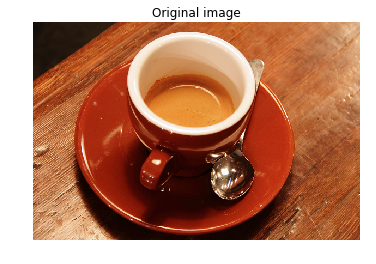

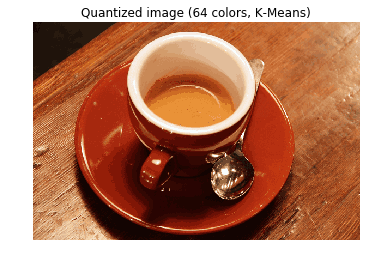

In [19]:
color_quantization_k_means(image, n_colors=64)

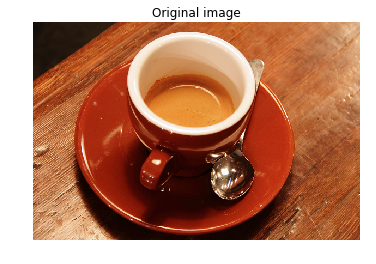

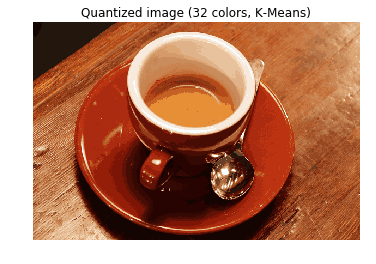

In [20]:
color_quantization_k_means(image, n_colors=32)

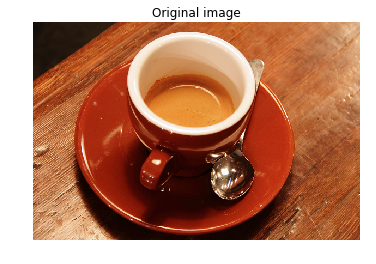

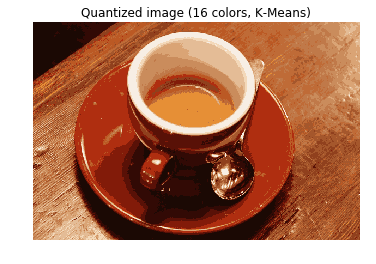

In [21]:
color_quantization_k_means(image, n_colors=16)

In [22]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)
X.shape

(500, 2)

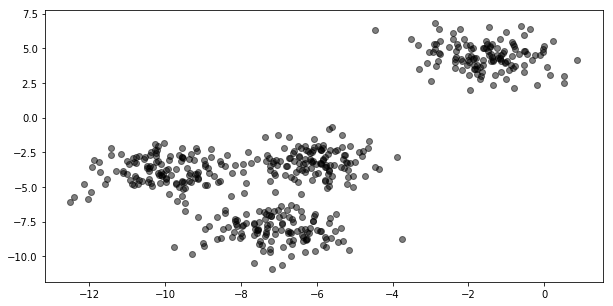

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'black')
plt.show()

In [24]:
range_n_clusters = [6,7, 8]

For n_clusters = 6 The average silhouette_score is : 0.43983666423501233
For n_clusters = 7 The average silhouette_score is : 0.3728615111052894
For n_clusters = 8 The average silhouette_score is : 0.32799178719839805


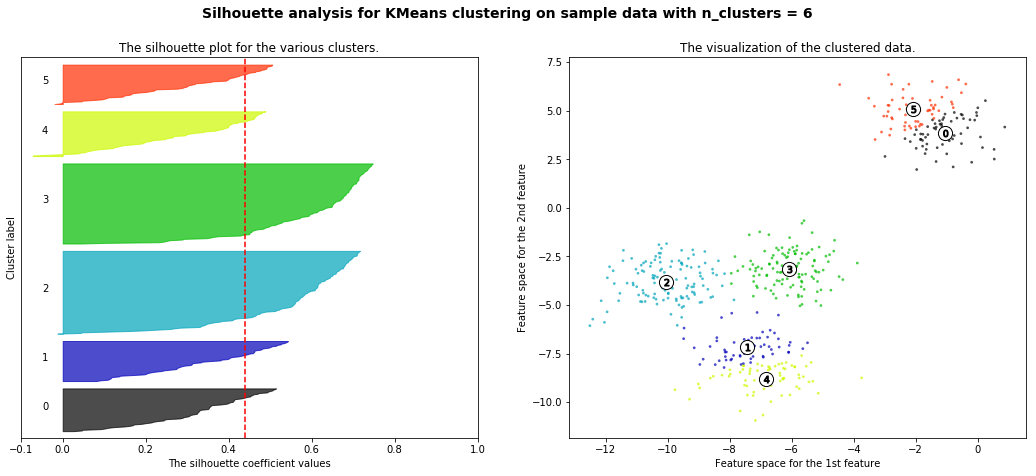

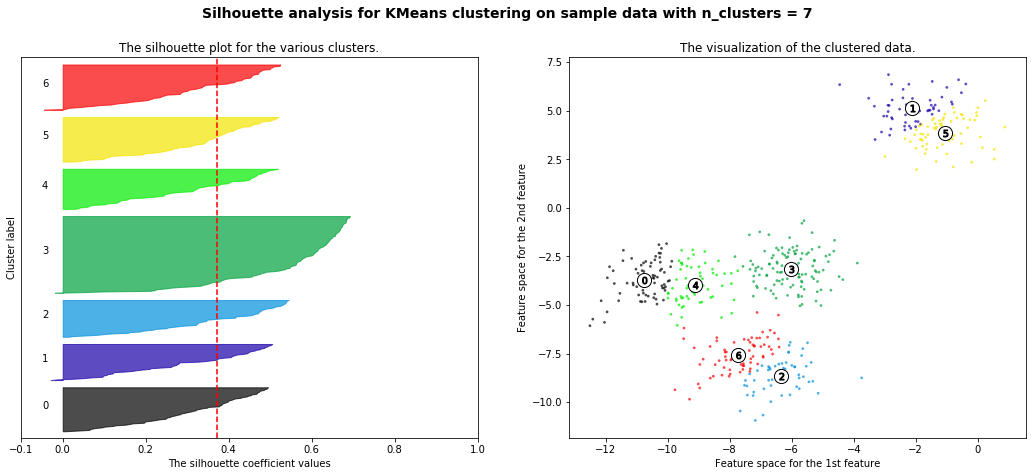

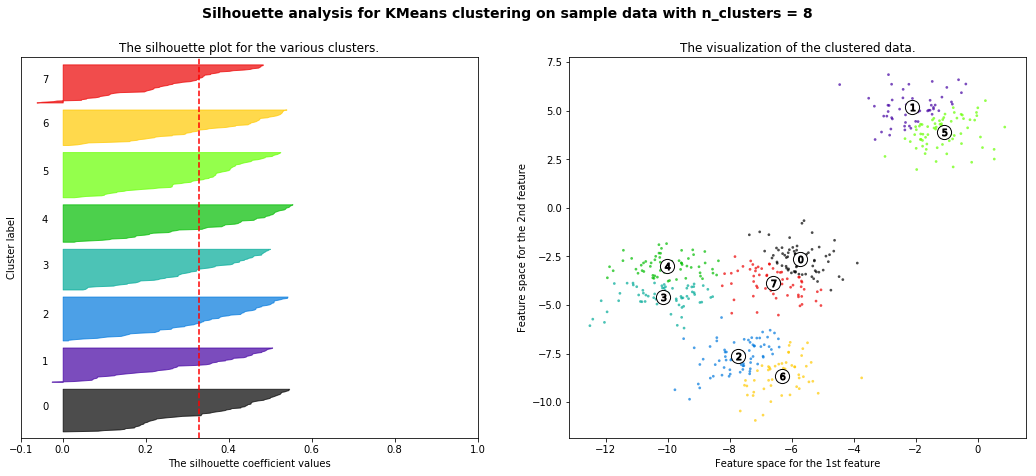

In [26]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)\
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
   
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [27]:
mean1 = (2, 3)
cov1 = [[1, 0], [0, 1]]
X1 = multivariate_normal(mean1, cov1, 200)

mean2 = (5, 6)
cov2 = [[2, 0], [0, 2]]
X2 = multivariate_normal(mean2, cov2, 200)
X = np.concatenate([X1, X2])

In [28]:
X.shape

(400, 2)

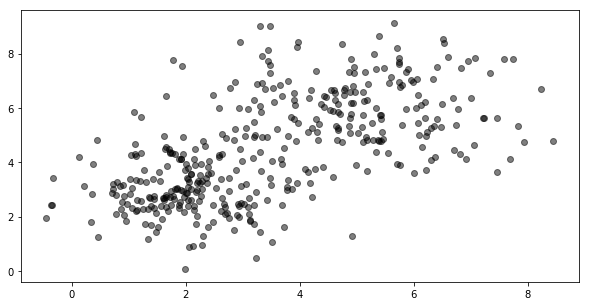

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'black')
plt.show()

In [30]:
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [31]:
clf.means_, clf.weights_, clf.covariances_

(array([[4.99643753, 6.0419124 ],
        [2.05109382, 2.99967857]]),
 array([0.48331936, 0.51668064]),
 array([[[ 1.89941488, -0.12719617],
         [-0.12719617,  1.66127916]],
 
        [[ 0.92094796,  0.02012149],
         [ 0.02012149,  1.0033806 ]]]))

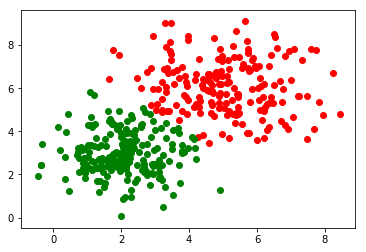

In [32]:
predicted = clf.predict(X)
for k in range(0,2):
    data = X[predicted==k]
    plt.scatter(data[:,0],data[:,1],c=['red','green'][k])
plt.show()

In [33]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [34]:
twenty_train.target_names #prints all the categories
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer( token_pattern=r'(?u)\b[a-zA-Z]\w+\b',
                              ngram_range=(1, 2),
                              stop_words='english' )
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 1065618)

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 1065618)

In [37]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [38]:
clf.score(X_train_counts, twenty_train.target)

0.9621707618879265

In [40]:
from wordcloud import WordCloud,STOPWORDS

wc=WordCloud(width =1000, height=1000,stopwords=STOPWORDS)
text = ' '.join(count_vect.get_feature_names())

embed_code=wc.generate(text=text)

MemoryError: 

In [41]:
plt.figure(figsize=(20,45), dpi =100)
plt.imshow(embed_code)

NameError: name 'embed_code' is not defined

<Figure size 2000x4500 with 0 Axes>